<a href="https://colab.research.google.com/github/serjduvk/Homework/blob/master/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Обнаружение мошенничества с кредитными картами

Контекст:

Важно, чтобы компании, выпускающие кредитные карты, могли распознавать мошеннические транзакции по кредитным картам, чтобы с клиентов не взималась плата за товары, которые они не покупали.

Содержание: 

Наборы данных содержат транзакции, совершенные европейскими держателями кредитных карт в сентябре 2013 года.
В этом наборе данных представлены транзакции, которые произошли за два дня, из которых у нас 492 мошенничества из 284 807 транзакций. Набор данных сильно несбалансирован, на положительный класс (мошенничество) приходится 0,172% всех транзакций.

Он содержит только числовые входные переменные, которые являются результатом преобразования PCA. К сожалению, из-за проблем с конфиденциальностью мы не можем предоставить исходные функции и дополнительную справочную информацию о данных. Характеристики V1, V2,… V28 являются основными компонентами, полученными с помощью PCA, единственными функциями, которые не были преобразованы с помощью PCA, являются «Время» и «Количество». Функция «Время» содержит секунды, прошедшие между каждой транзакцией и первой транзакцией в наборе данных. Функция «Сумма» - это сумма транзакции, эту функцию можно использовать для обучения с учетом затрат и затрат. Функция «Класс» - это целевая переменная ответа, которая принимает значение 1 в случае мошенничества и 0 в противном случае.


Учитывая коэффициент дисбаланса класса, рекомендуется измерять точность, используя площадь под кривой точности-отзыва (AUPRC). Точность матрицы неточностей не имеет значения для несбалансированной классификации.

In [9]:
import numpy as np
import pandas as pd
import time


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

#отключить все предупреждения
import warnings
warnings.filterwarnings('ignore')


In [10]:
#подключаем гуглдиск
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df = pd.read_csv("/content/drive/My Drive/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [16]:
# Установим специальный пакет, предназначенный для профилирования Pandas Dataframe'ов
import sys

!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension #устанавливаем последнюю версию
# Для Desctop версии: !pip install pandas-profiling
# или если у вас conda - то !conda install -c anaconda pandas-profiling

#Перезапустите ноутбук после установки!

Requirement already up-to-date: pandas-profiling[notebook] in /usr/local/lib/python3.6/dist-packages (2.10.1)
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [17]:
import pandas_profiling # Импортируем только что установленную библиотеку

report = df.profile_report(sort="None", html={"style": {"full_width": True}}, progress_bar=True)
report

AttributeError: ignored

In [5]:
report.to_file("example.html")

NameError: ignored

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3286b664a8>,
      dtype=object)

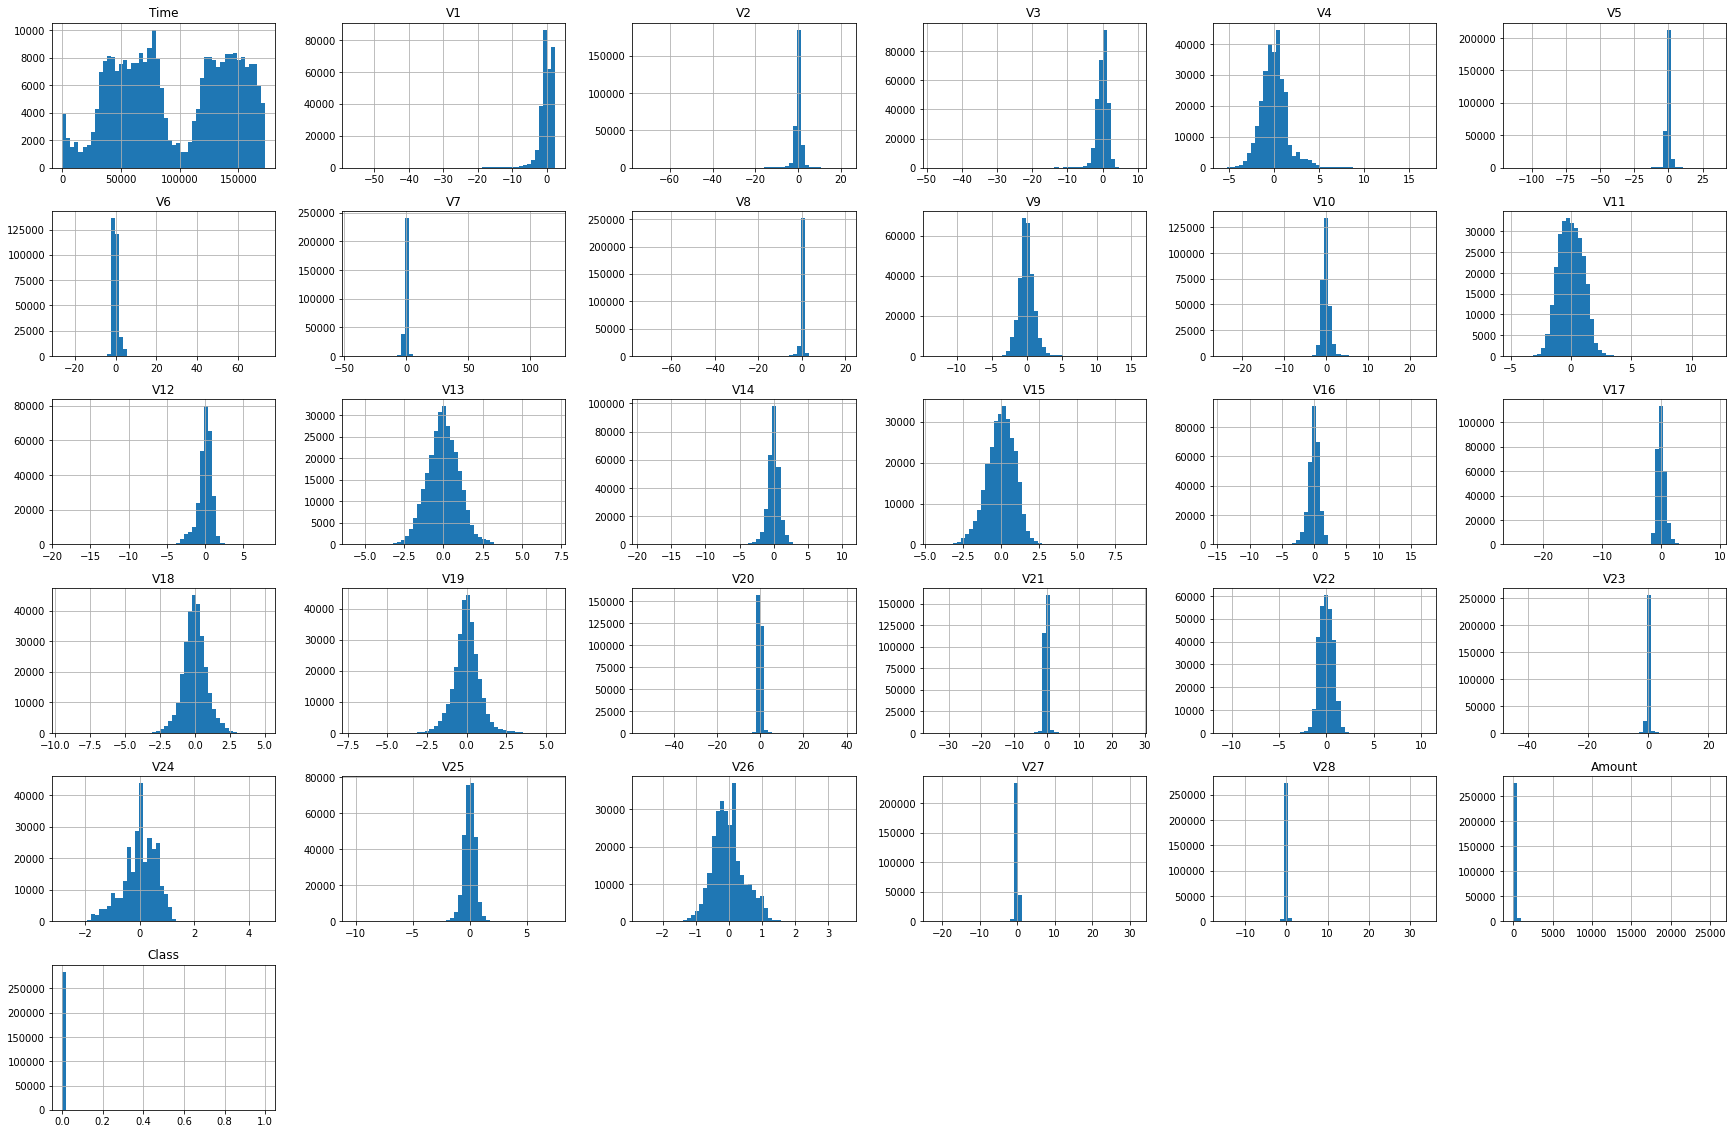

In [ ]:
df.hist(figsize=(30,20), bins=50)

Рассмотрим зависимость случаев мошенничества от времени проведения транзакций

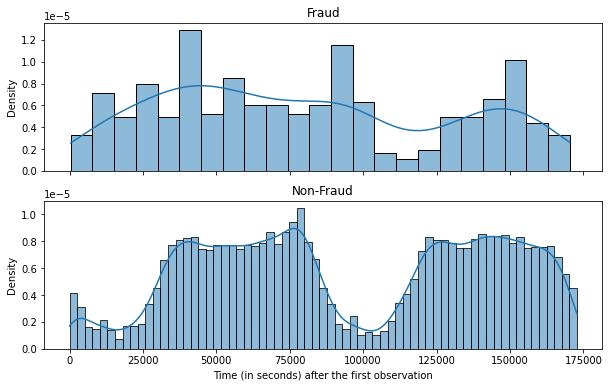

In [4]:
f,(ax1,ax2)  = plt.subplots(2,1,figsize=(10,6),sharex=True)

sns.histplot(df.loc[(df.Class==1),'Time'],kde=True,stat='density',ax=ax1,bins='sqrt') # sqrt of number of fraud operat
ax1.set_title('Fraud')
ax2.set_xlabel('Time (in seconds) after the first observation')
sns.histplot(df.loc[(df.Class==0),'Time'],kde=True,stat='density',ax=ax2)
ax2.set_title('Non-Fraud')
plt.show()

In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

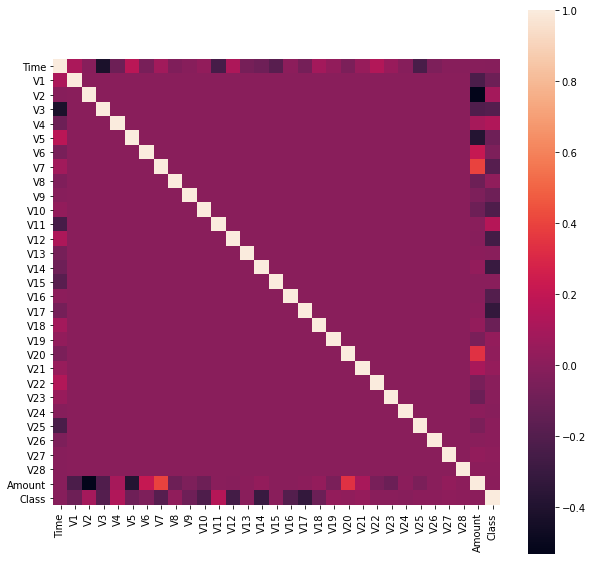

In [5]:
#построим матрицу кореляций

plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), square=True)
plt.show()

In [6]:
# перемешка
df = df.sample(frac=1).reset_index(drop=True)

In [7]:
#выделим целевую переменную и определеим размер тестовой и обучающей выборки
y= df['Class']
X= df.loc[:, df.columns != 'Class']

from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.3, random_state = 99, stratify=y)

In [8]:
#нормализуем данные
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


In [10]:
print(X_train.shape)
print(y_train.shape)

(199364, 30)
(199364,)


Будем использовать пакет Power Transformer из библиотеки предварительной обработки, предоставляемой sklearn, чтобы сделать распределение более гауссовским. Это полезно для моделирования проблем, связанных с гетероскедастичностью (непостоянной дисперсией) или других ситуаций, когда желательна нормальность. По умолчанию к преобразованным данным применяется нормализация с нулевым средним и единичной дисперсией. 

In [11]:
from sklearn.preprocessing import PowerTransformer

pt= preprocessing.PowerTransformer(method='yeo-johnson', copy=True)
pt.fit(X_train)                       
X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)
y_train_pt = y_train
y_test_pt = y_test
print(X_train_pt.shape)
print(y_train_pt.shape)

(199364, 30)
(199364,)


In [12]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from imblearn import over_sampling

In [24]:
#Имплементация модели XGBoost на нормализированных и перемешанных данных 
%%time
# xgboost for classification
from numpy import mean
from numpy import std
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

model = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = XGBClassifier()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
score= metrics.roc_auc_score(y_true=y_test,y_score=yhat)
print("XGBoost Classifier Test ROC-AUC Score =", score)

Accuracy: 1.000 (0.000)
XGBoost Classifier Test ROC-AUC Score = 0.8749413799167595
CPU times: user 51.7 s, sys: 82.7 ms, total: 51.8 s
Wall time: 5min 8s


In [25]:
print(metrics.classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.75      0.83       148

    accuracy                           1.00     85443
   macro avg       0.96      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [22]:
##Имплементация модели XGBoost на нормализированных и перемешанных данных после использования пакета Power Transformer
%%time
# xgboost for classification
from numpy import mean
from numpy import std
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

model = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train_pt, y_train_pt, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = XGBClassifier()
model.fit(X_train_pt, y_train_pt)
yhat = model.predict(X_test)
score= metrics.roc_auc_score(y_true=y_test,y_score=yhat)
print("XGBoost Classifier Test ROC-AUC Score =", score)

Accuracy: 1.000 (0.000)
XGBoost Classifier Test ROC-AUC Score = 0.8783080342784898
CPU times: user 52.5 s, sys: 134 ms, total: 52.6 s
Wall time: 5min 12s


In [23]:
print(metrics.classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.76      0.82       148

    accuracy                           1.00     85443
   macro avg       0.95      0.88      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [29]:
##Имплементация модели XGBoost на нормализированных и перемешанных данных после проведения аугментации методом оверсемпленга
%%time
# xgboost for classification
from numpy import mean
from numpy import std
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
#выполним аугментацию данных методом оверсемплинга
ros = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
X_ros,y_ros = ros.fit_resample(X_train,y_train)
model = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_ros, y_ros, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = XGBClassifier()
model.fit(X_ros, y_ros)
yhat = model.predict(X_test)
score= metrics.roc_auc_score(y_true=y_test,y_score=yhat)
print("XGBoost Classifier Test ROC-AUC Score =", score)

Accuracy: 0.983 (0.001)
XGBoost Classifier Test ROC-AUC Score = 0.9301246627364805
CPU times: user 2min, sys: 233 ms, total: 2min 1s
Wall time: 11min 38s


In [30]:
print(metrics.classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.12      0.87      0.21       148

    accuracy                           0.99     85443
   macro avg       0.56      0.93      0.60     85443
weighted avg       1.00      0.99      0.99     85443



In [26]:
#Имплементация модели XGBoost на нормализированных и перемешанных данных после использования пакета Power Transformer и проведения аугментации методом оверсемпленга
%%time
# xgboost for classification
from numpy import mean
from numpy import std
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
#выполним аугментацию данных методом оверсемплинга
ros = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
X_ros,y_ros = ros.fit_resample(X_train_pt,y_train_pt)
model = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_ros, y_ros, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = XGBClassifier()
model.fit(X_ros, y_ros)
yhat = model.predict(X_test)
score= metrics.roc_auc_score(y_true=y_test,y_score=yhat)
print("XGBoost Classifier Test ROC-AUC Score =", score)

Accuracy: 0.981 (0.000)
XGBoost Classifier Test ROC-AUC Score = 0.9307244491692584
CPU times: user 1min 58s, sys: 315 ms, total: 1min 58s
Wall time: 11min 42s


In [28]:
print(metrics.classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.08      0.88      0.15       148

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.57     85443
weighted avg       1.00      0.98      0.99     85443



Вывод: Наилучший результат получен при имплементации модели XGBoost на нормализированных и перемешанных данных, после использования пакета Power Transformer и проведения аугментации методом оверсемплинга.

In [32]:
!pip install catboost

### catboost for classification

In [33]:
#Имплементация модели CatBoost на нормализированных и перемешанных данных после проведения аугментации методом оверсемпленга
%%time
# catboost for classification
from numpy import mean
from numpy import std
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
#выполним аугментацию данных методом оверсемплинга
ros = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
X_ros,y_ros = ros.fit_resample(X_train,y_train)

model = CatBoostClassifier(verbose=0, n_estimators=100)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_ros, y_ros, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = CatBoostClassifier(verbose=0, n_estimators=100)

#обучим модель на аугментированном наборе данных 
model.fit(X_ros, y_ros)
y_pred2 = model.predict(X_test)
score= metrics.roc_auc_score(y_true=y_test,y_score=y_pred2)
print("CatBoost Classifier Test ROC-AUC Score =", score)

Accuracy: 0.999 (0.000)
CatBoost Classifier Test ROC-AUC Score = 0.901464274227918
CPU times: user 34.5 s, sys: 1.74 s, total: 36.3 s
Wall time: 9min 1s


In [34]:
print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.55      0.80      0.66       148

    accuracy                           1.00     85443
   macro avg       0.78      0.90      0.83     85443
weighted avg       1.00      1.00      1.00     85443



In [35]:
#Имплементация модели CatBoost на нормализированных и перемешанных данных после использования пакета Power Transformer и проведения аугментации методом оверсемпленга
%%time
# catboost for classification
from numpy import mean
from numpy import std
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot

pt= preprocessing.PowerTransformer(method='yeo-johnson', copy=True)
pt.fit(X_train)                       
X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)
y_train_pt = y_train
y_test_pt = y_test
#выполним аугментацию данных методом оверсемплинга
ros = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
X_ros,y_ros = ros.fit_resample(X_train_pt,y_train_pt)

model = CatBoostClassifier(verbose=0, n_estimators=100)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_ros, y_ros, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = CatBoostClassifier(verbose=0, n_estimators=100)
#обучим модель на аугментированном наборе данных 
model.fit(X_ros, y_ros)
y_pred2 = model.predict(X_test)
score= metrics.roc_auc_score(y_true=y_test,y_score=y_pred2)
print("CatBoost Classifier Test ROC-AUC Score =", score)

Accuracy: 0.999 (0.000)
CatBoost Classifier Test ROC-AUC Score = 0.8870128393825562
CPU times: user 50 s, sys: 1.79 s, total: 51.8 s
Wall time: 9min 18s


In [36]:
print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.31      0.78      0.44       148

    accuracy                           1.00     85443
   macro avg       0.65      0.89      0.72     85443
weighted avg       1.00      1.00      1.00     85443



Вывод 2: Наилучший результат Catboost показал на нормализированных и перемешанных данных после проведения аугментации методом оверсемпленга без использования пакета Power Transformer. Скорость работы Catboost примерно в 3 раза выше.

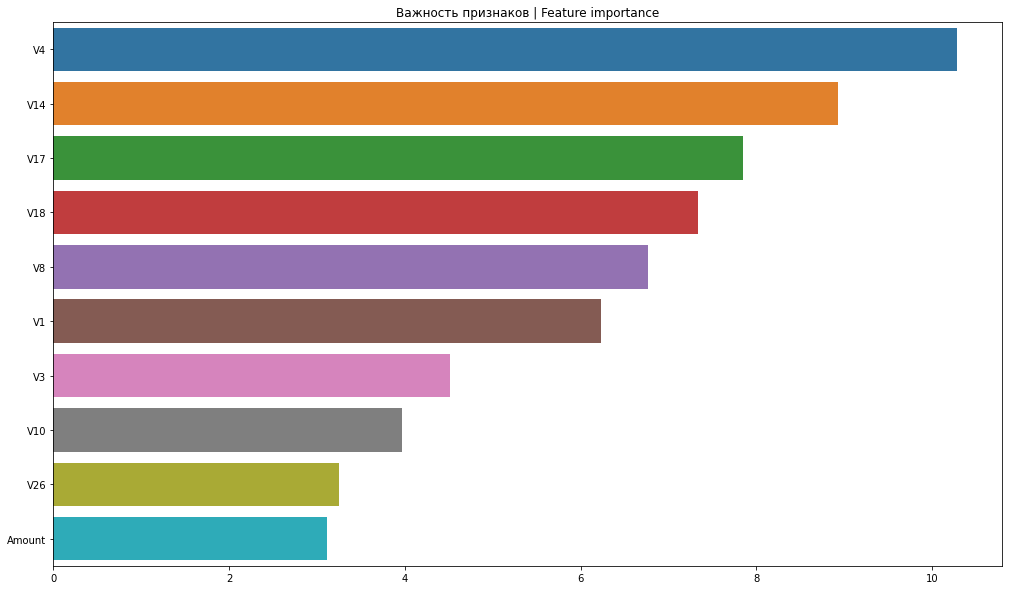

In [37]:
column_names = list(X.columns)
def plot_feature_importances(model, columns):
    # выбираем кол-во признаков для отображения
    nr_f = 10
    # берем данные для графика
    # берем алгоритм с лучшими параметрами
    # по х мы берем важность признаков исходя из критерия Джини, сортируем их вместе с названиями колонок по возрастанию
    imp = pd.Series(data = model.feature_importances_, 
                    index=columns).sort_values(ascending=False)
    # построили фигуру
    plt.figure(figsize=(17,10))
    # отобразили название
    plt.title("Важность признаков | Feature importance")
    # построили 10 самых важных признаков
    ax = sns.barplot(y=imp.index[:nr_f], x=imp.values[:nr_f], orient='h')


# вызвали функцию отображения самых важных признаков
# тут columns - название всех колонок, типа encoded_df.columns
plot_feature_importances(model, column_names)

Проверим как повлияет на качество работы модели исключение времени и объединение колонок с параметрами, которые по матрице корреляций не коррелировали с целевой функцией. На матрице корреляций у параметров V19-V28 нулевая корреляция с мошенничеством. Попробуем их заменить одним значением с суммой этих параметров.

In [18]:
df=df.drop('Time',axis=1)

In [31]:
df['svd']=df[['V19','V20','V21','V22','V23','V24','V25','V26','V27','V28']].sum(axis='columns')

In [32]:
df=df.drop(['V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'],axis=1)

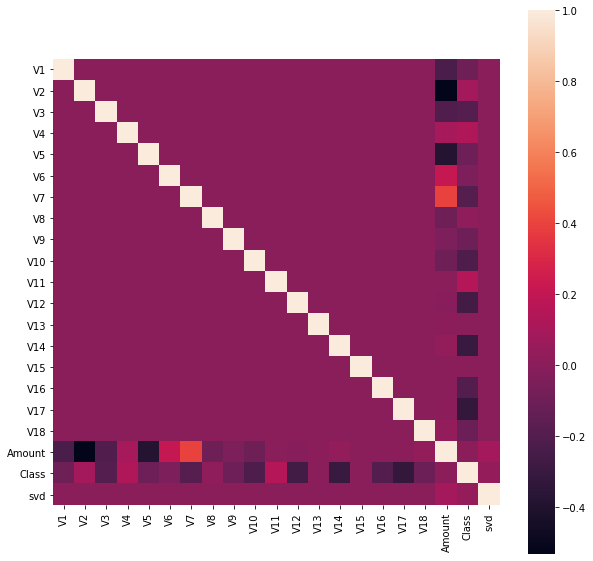

In [33]:
#построим матрицу кореляций

plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), square=True)
plt.show()

In [34]:
# перемешка
df = df.sample(frac=1).reset_index(drop=True)

In [35]:
#выделим целевую переменную и определеим размер тестовой и обучающей выборки
y= df['Class']
X= df.loc[:, df.columns != 'Class']

from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.3, random_state = 99, stratify=y)

In [36]:
#нормализуем данные
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
from sklearn.preprocessing import PowerTransformer

pt= preprocessing.PowerTransformer(method='yeo-johnson', copy=True)
pt.fit(X_train)                       

X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

y_train_pt = y_train
y_test_pt = y_test
print(X_train_pt.shape)
print(y_train_pt.shape)

(199364, 20)
(199364,)


In [44]:
##Имплементация модели XGBoost на нормализированных и перемешанных данных после проведения аугментации методом оверсемпленга
%%time
# xgboost for classification
from numpy import mean
from numpy import std
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
#выполним аугментацию данных методом оверсемплинга
ros = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
X_ros,y_ros = ros.fit_resample(X_train,y_train)
model = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_ros, y_ros, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = XGBClassifier()
model.fit(X_ros, y_ros)
yhat = model.predict(X_test)
score= metrics.roc_auc_score(y_true=y_test,y_score=yhat)
print("XGBoost Classifier Test ROC-AUC Score =", score)

Accuracy: 0.980 (0.001)
XGBoost Classifier Test ROC-AUC Score = 0.939720493105803
CPU times: user 1min 20s, sys: 182 ms, total: 1min 21s
Wall time: 7min 49s


In [45]:
print(metrics.classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.11      0.89      0.20       148

    accuracy                           0.99     85443
   macro avg       0.56      0.94      0.60     85443
weighted avg       1.00      0.99      0.99     85443



### catboost for classification

In [40]:
# Использование Catboost на нормализованных и аугментированных данных
from numpy import mean
from numpy import std
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn import over_sampling
from matplotlib import pyplot
#выполним аугментацию данных методом оверсемплинга
ros = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
X_ros,y_ros = ros.fit_resample(X_train,y_train)

model = CatBoostClassifier(verbose=0, n_estimators=100)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_ros, y_ros, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = CatBoostClassifier(verbose=0, n_estimators=100)

#обучим модель на аугментированном наборе данных 
model.fit(X_ros, y_ros)
y_pred2 = model.predict(X_test)
score= metrics.roc_auc_score(y_true=y_test,y_score=y_pred2)
print("CatBoost Classifier Test ROC-AUC Score =", score)

Accuracy: 0.999 (0.000)
CatBoost Classifier Test ROC-AUC Score = 0.9181568578367922


In [42]:
print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.49      0.84      0.62       148

    accuracy                           1.00     85443
   macro avg       0.74      0.92      0.81     85443
weighted avg       1.00      1.00      1.00     85443



In [43]:

# Использование catboost на нормализованных и аугментированных данных с пакетом PowerTransformer
from numpy import mean
from numpy import std
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot

pt= preprocessing.PowerTransformer(method='yeo-johnson', copy=True)
pt.fit(X_train)                       
X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)
y_train_pt = y_train
y_test_pt = y_test
#выполним аугментацию данных методом оверсемплинга
ros = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
X_ros,y_ros = ros.fit_resample(X_train_pt,y_train_pt)

model = CatBoostClassifier(verbose=0, n_estimators=100)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_ros, y_ros, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = CatBoostClassifier(verbose=0, n_estimators=100)

#обучим модель на аугментированном наборе данных 
model.fit(X_ros, y_ros)
y_pred2 = model.predict(X_test)
score= metrics.roc_auc_score(y_true=y_test,y_score=y_pred2)
print("CatBoost Classifier Test ROC-AUC Score =", score)

Accuracy: 0.999 (0.000)
CatBoost Classifier Test ROC-AUC Score = 0.9112769989052303


In [ ]:
print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.31      0.86      0.46       148

    accuracy                           1.00     85443
   macro avg       0.65      0.93      0.73     85443
weighted avg       1.00      1.00      1.00     85443



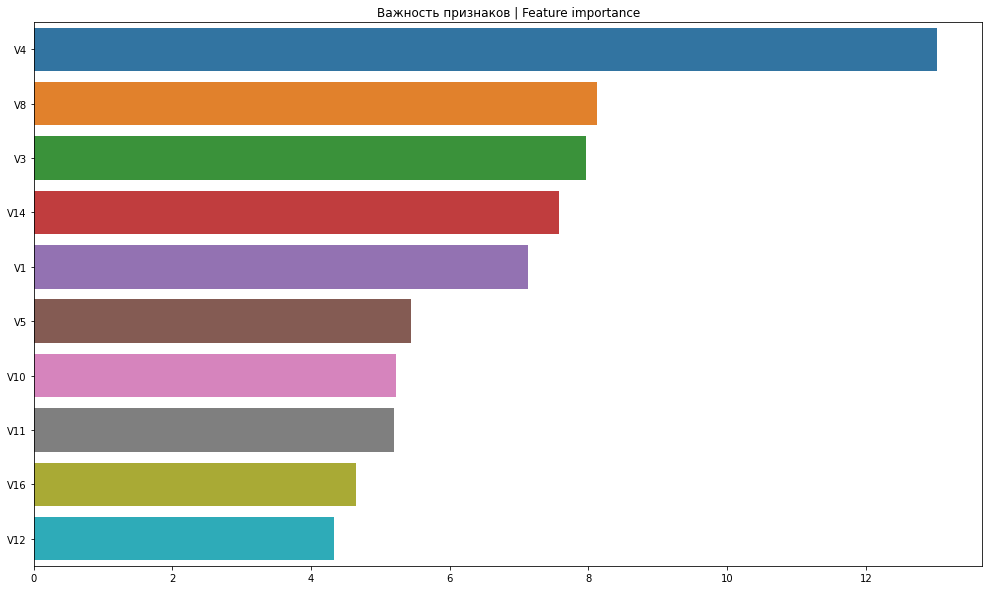

In [ ]:
column_names = list(X.columns)
def plot_feature_importances(model, columns):
    # выбираем кол-во признаков для отображения
    nr_f = 10
    # берем данные для графика
    # берем алгоритм с лучшими параметрами
    # по х мы берем важность признаков исходя из критерия Джини, сортируем их вместе с названиями колонок по возрастанию
    imp = pd.Series(data = model.feature_importances_, 
                    index=columns).sort_values(ascending=False)
    # построили фигуру
    plt.figure(figsize=(17,10))
    # отобразили название
    plt.title("Важность признаков | Feature importance")
    # построили 10 самых важных признаков
    ax = sns.barplot(y=imp.index[:nr_f], x=imp.values[:nr_f], orient='h')


# вызвали функцию отображения самых важных признаков
# тут columns - название всех колонок, типа encoded_df.columns
plot_feature_importances(model, column_names)